In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

from data_loading import *
from isoform_pairwise_metrics import *
from plotting import y1h_pdi_per_tf_gene_plot, m1h_activation_per_tf_gene_plot, COLOR_PURPLE
from data_loading import load_annotated_6k_collection, load_y1h_pdi_data

In [2]:
tfs = load_annotated_6k_collection()

reading from cache


## TBX5

In [3]:
kfit_dat = pd.read_table("../data/internal/pbms/TBX5_kfit_dat.csv", sep=",")
ds_dat = pd.read_table("../data/internal/pbms/TBX5_ds_dat.csv", sep=",")
da_dat = pd.read_table("../data/internal/pbms/TBX5_da_dat.csv", sep=",")

In [4]:
kfit_ref = kfit_dat[kfit_dat["cname"] == "TBX5C05-REF"]
kfit_3 = kfit_dat[kfit_dat["cname"] == "TBX5A05"]
kfit_2 = kfit_dat[kfit_dat["cname"] == "TBX5B05"]

In [5]:
kfit_vs = kfit_ref.merge(kfit_2, on=["seq"], suffixes=("_ref", ""))
kfit_vs = kfit_vs.merge(kfit_3, on=["seq"], suffixes=("_iso2", "_iso3"))
kfit_vs.head()

,seq,cname_ref,affinityEstimate_ref,affinityVariance_ref,contrastDifference_ref,contrastAverage_ref,contrastVariance_ref,contains_any_motif_ref,cname_iso2,affinityEstimate_iso2,...,contrastAverage_iso2,contrastVariance_iso2,contains_any_motif_iso2,cname_iso3,affinityEstimate_iso3,affinityVariance_iso3,contrastDifference_iso3,contrastAverage_iso3,contrastVariance_iso3,contains_any_motif_iso3
0,AAAAAAAA,TBX5C05-REF,10.028611,0.004803,NaN,NaN,NaN,other k-mer,TBX5B05,9.903240,...,9.965926,0.003227,other k-mer,TBX5A05,9.931881,0.003412,-0.096730,9.980246,0.003536,other k-mer
1,AAAAAAAC,TBX5C05-REF,9.956585,0.001912,NaN,NaN,NaN,other k-mer,TBX5B05,9.934673,...,9.945629,0.005728,other k-mer,TBX5A05,9.957827,0.003953,0.001242,9.957206,0.003823,other k-mer
2,AAAAAAAG,TBX5C05-REF,10.115281,0.008088,NaN,NaN,NaN,other k-mer,TBX5B05,10.040526,...,10.077904,0.004583,other k-mer,TBX5A05,9.936246,0.004633,-0.179034,10.025764,0.005549,other k-mer
3,AAAAAAAT,TBX5C05-REF,10.020661,0.004480,NaN,NaN,NaN,other k-mer,TBX5B05,9.994817,...,10.007739,0.003959,other k-mer,TBX5A05,9.973363,0.002724,-0.047297,9.997012,0.004635,other k-mer
4,AAAAAACA,TBX5C05-REF,10.005205,0.005584,NaN,NaN,NaN,other k-mer,TBX5B05,9.981221,...,9.993213,0.004405,other k-mer,TBX5A05,9.912703,0.003827,-0.092501,9.958954,0.004838,other k-mer


In [6]:
ds_3 = ds_dat[ds_dat["cname"] == "TBX5A05"]
ds_2 = ds_dat[ds_dat["cname"] == "TBX5B05"]

In [7]:
kfit_vs = kfit_vs.merge(ds_2[["seq", "specificityQ_cut"]], on="seq")
kfit_vs = kfit_vs.merge(ds_3[["seq", "specificityQ_cut"]], on="seq", suffixes=("_iso2", "_iso3"))

In [31]:
kfit_vs.contains_any_motif_ref.value_counts()

other k-mer       32800
* ACGTGT k-mer       48
* TBX5 k-mer         48
Name: contains_any_motif_ref, dtype: int64

In [40]:
sns.color_palette("Spectral_r", n_colors=4)

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9019607843137255, 0.9607843137254902, 0.596078431372549),
 (0.996078431372549, 0.8784313725490197, 0.5450980392156864),
 (0.9568627450980393, 0.42745098039215684, 0.2627450980392157)]

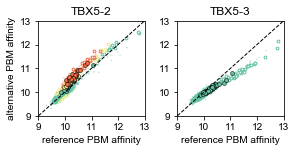

In [71]:
fig, axarr = plt.subplots(1, 2, figsize=(4, 2))

markers = [",", ".", "o"]
titles = ["TBX5-2", "TBX5-3"]

for i, suffix in enumerate(["iso2", "iso3"]):
    
    ax = axarr[i]

    for k, motif in enumerate(["other k-mer", "* TBX5 k-mer", "* ACGTGT k-mer"]):
        for j, qval in enumerate(["(0.1,1]", "(0.01,0.1]", "(0.001,0.01]", "[0,0.001]"]):
            
            sub = kfit_vs[(kfit_vs["specificityQ_cut_%s" % suffix] == qval) & 
                          (kfit_vs["contains_any_motif_ref"] == motif)]
            xs = sub["affinityEstimate_ref"]
            ys = sub["affinityEstimate_%s" % suffix]
            
            color = sns.color_palette("Spectral_r", n_colors=4)[j]
            marker = markers[k]
            
            if marker == "o":
                ax.scatter(xs, ys, 15, marker=marker, edgecolors="black", facecolors=color, alpha=1, linewidth=0.5)
            elif marker == ",":
                ax.scatter(xs, ys, 1, marker=".", edgecolors=color, facecolors='none', alpha=0.5)
            else:
                ax.scatter(xs, ys, 30, marker=marker, edgecolors=color, facecolors='white', alpha=1)
                
    
    ax.set_xlim((9, 13))
    ax.set_ylim((9, 13))
    ax.plot([9, 13], [9, 13], color="black", linestyle="dashed", linewidth=1, zorder=1)
    ax.set_xticks([9, 10, 11, 12, 13])
    ax.set_yticks([9, 10, 11, 12, 13])
    ax.set_xlabel("reference PBM affinity")
    ax.set_title(titles[i])
    
axarr[0].set_ylabel("alternative PBM affinity")
fig.savefig("../figures/TBX5_isoforms_pbm_scatter.pdf", dpi="figure", bbox_inches="tight")

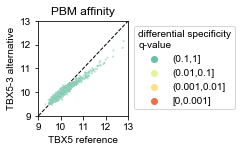

In [30]:
fig = plt.figure(figsize=(3.25, 2))

ax = sns.scatterplot(data=kfit_vs, x="affinityEstimate_ref", y="affinityEstimate_iso3", s=4, alpha=0.5, linewidths=0,
                     hue="specificityQ_cut_iso3", palette="Spectral_r", zorder=10, hue_order=["(0.1,1]",
                                                                                              "(0.01,0.1]",
                                                                                              "(0.001,0.01]",
                                                                                              "[0,0.001]"])
ax.set_xlim((9, 13))
ax.set_ylim((9, 13))
ax.plot([9, 13], [9, 13], color="black", linestyle="dashed", linewidth=1, zorder=1)
ax.set_xticks([9, 10, 11, 12, 13])
ax.set_yticks([9, 10, 11, 12, 13])
ax.set_xlabel("TBX5 reference")
ax.set_ylabel("TBX5-3 alternative")
ax.set_title("PBM affinity")

plt.legend(loc=2, bbox_to_anchor=(1.01, 1), title="differential specificity\nq-value")
fig.savefig("../figures/TBX5_iso3_pbm_scatter.pdf", bbox_inches="tight", dpi="figure")